

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [5]:
# your code here
# use many cells if you like to structure your code well

from IPython.display import HTML

google_sheet_url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/preview?usp=sharing"

iframe = f'<iframe src="{google_sheet_url}" width="85%" height="500"></iframe>'

display(HTML(iframe))


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [89]:
# your code here
# use many cells if you like to structure your code well

import pandas as pd
import os 
import seaborn as sns

f = 'data/Afghanistan'

f = 'data/Afghanistan/Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv'

db = pd.read_csv(f, skiprows=1)

print(db.columns)

Key_and_value = db.loc[0].to_dict()
print(Key_and_value)

db.head()

db_dropped = db.drop(index=72)
#drop row with total numbers
print(db_dropped)

db.tail()
#row is still in table

Index(['Year', 'Month', 'Taliban', 'Civilians', 'Afghan forces',
       'Nato (detailed in spreadsheet)', 'Nato - official figures'],
      dtype='object')
{'Year': 2004.0, 'Month': 'January', 'Taliban': '15', 'Civilians': '51', 'Afghan forces': '23', 'Nato (detailed in spreadsheet)': nan, 'Nato - official figures': 11.0}
      Year      Month Taliban Civilians Afghan forces  \
0   2004.0    January      15        51            23   
1   2004.0   February     NaN         7             4   
2   2004.0      March      19         2           NaN   
3   2004.0      April       5         3            19   
4   2004.0        May      18        29            56   
..     ...        ...     ...       ...           ...   
67  2009.0     August     445       206           190   
68  2009.0  September     614       197           133   
69  2009.0    October     462       107            86   
70  2009.0   November     410       120            69   
71  2009.0   December     287        87          

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
68,2009.0,September,614,197,133,54,70.0
69,2009.0,October,462,107,86,76,74.0
70,2009.0,November,410,120,69,30,32.0
71,2009.0,December,287,87,65,33,35.0
72,NaN,24498,"15,507","4,024","3,820","1,147",NaN


## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

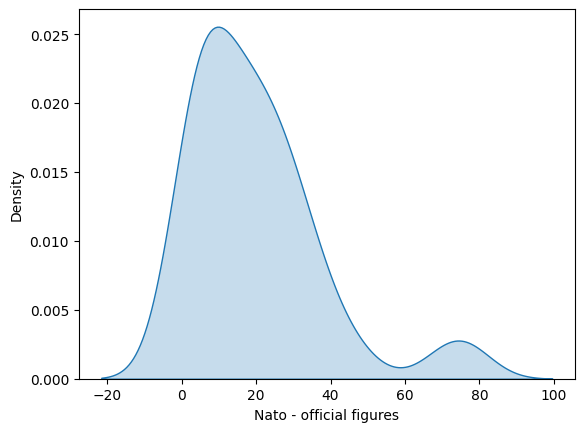

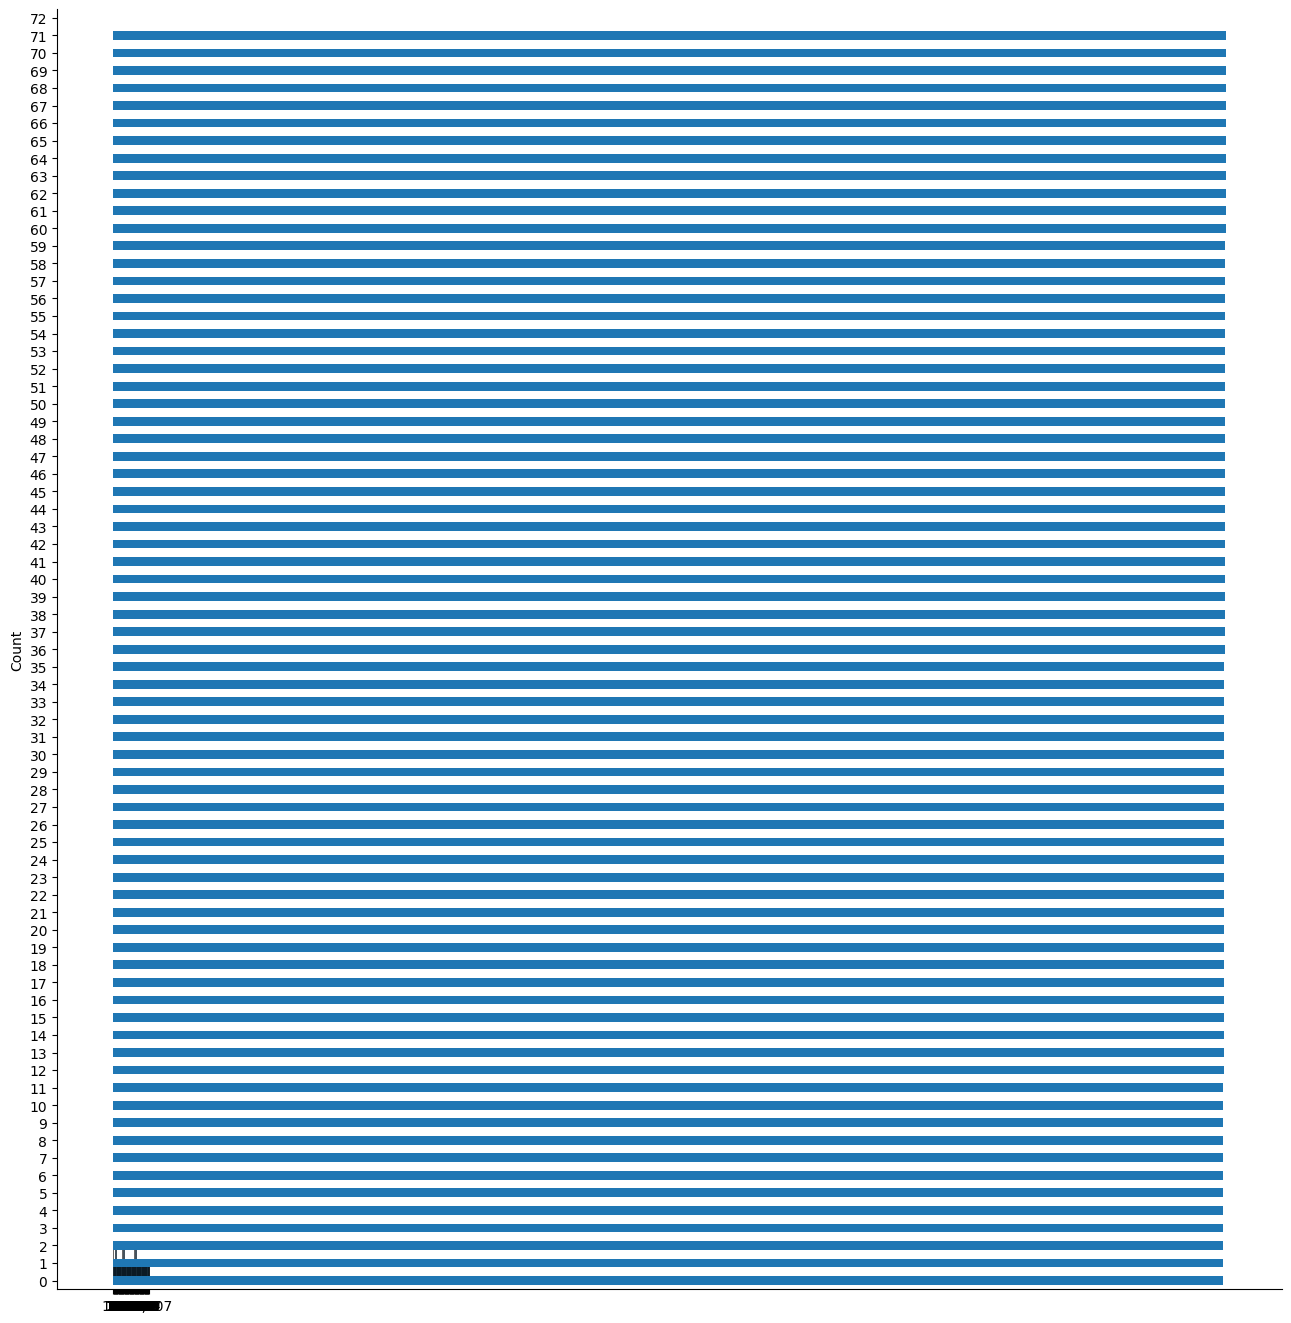

In [5]:
# your code here
# use many cells if you like to structure your code well

Nato_official_counts = sns.kdeplot(db['Nato - official figures'], fill=True)

Taliban_counts = sns.displot(db['Taliban'], kde=False)

#Year = db['Year'].sort_values(ascending=False).plot(kind='bar')
#very messy graph

Year1 = db['Year'].sort_values().plot(kind='barh', figsize=(15, 15))

#still very messy, I want to combine the year and month to create one date value and show casualties per date


## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [19]:
# your code here
# use many cells if you like to structure your code well

Specific_value = db.iloc[4, 2]
Specific_value

Taliban_5 = db.loc[db['Nato - official figures'] == 5, :]
Taliban_5

Taliban_more_than_5 = db.loc[db['Nato - official figures'] > 5, :]
Taliban_more_than_5

#error - '<=' not supported between instances of 'str' and 'int'
#Taliban numbers were not an integer? but Nato numbers were

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004.0,January,15,51,23,NaN,11.0
4,2004.0,May,18,29,56,6,9.0
9,2004.0,October,13,14,14,2,8.0
10,2004.0,November,21,19,36,2,7.0
14,2005.0,March,38,18,2,2,6.0
15,2005.0,April,118,5,4,2,19.0
17,2005.0,June,143,31,4,24,29.0
19,2005.0,August,90,6,10,13,33.0
20,2005.0,September,89,12,29,12,12.0
21,2005.0,October,122,15,10,3,10.0


## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            72 non-null     float64
 1   Month                           73 non-null     object 
 2   Taliban                         72 non-null     object 
 3   Civilians                       73 non-null     object 
 4   Afghan forces                   71 non-null     object 
 5   Nato (detailed in spreadsheet)  67 non-null     object 
 6   Nato - official figures         72 non-null     float64
 7   Total Casualties per month      71 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.7+ KB


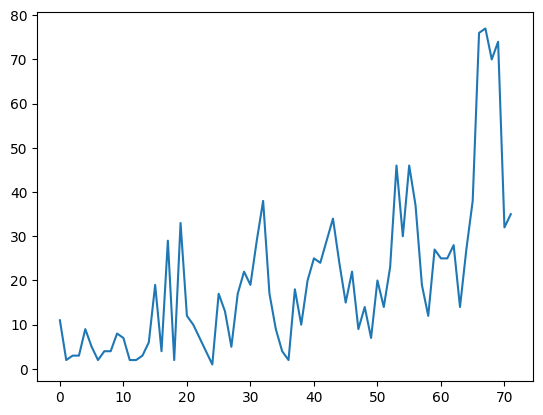

In [100]:

#db['Civilians'] = db['Civilians'].astype(float)
#db['Afghan forces'] = db['Afghan forces'].astype(float)

Total_casualties = (db['Civilians'] + db['Afghan forces'])
db['Total Casualties per month'] = Total_casualties
#mistake made in sum --> 1+1=11 according to this math
#fixed by using .astype(float) as it was fucked
#thought it was fixed but it is not

Civilians_and_Afghan_forces = db[['Year', 'Month', 'Civilians', 'Afghan forces', 'Total Casualties per month']]
Civilians_and_Afghan_forces.head()

#What is a list?

db.info()

#trying to change the strings to floats
#db['Year'] = db['Year'].astype(str)
#?db['Year'] = db['Year'].astype(float).astype(int).astype(str)
#Somehow the Dtype 'object' turned into a float64 after using this command

#Date = (db ['Month'] + db['Year'])
db.head()

line_ = db['Nato - official figures'].plot(x='Year', y='Nato - official figures')
#'Total Casualties per month' was not numerical so I could not make a graph

